In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
file_path1 = r"C:\Users\sowmy\OneDrive\Desktop\IS\Housing Price Data-PA.xlsx"
data = pd.read_excel(file_path1)
data.head()

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in $ (lakhs),Price in $ (millions),Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in Township,Mall in Township,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pennsylvania, USA",Pittsburgh,1 BHK,492,39,3.9,Lennar Corporation,The Heights at Falling Water,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,A modern community with 1BHK properties offeri...
1,2,"Pennsylvania, USA",Philadelphia,2 BHK,774,65,6.5,Toll Brothers,Chestnut Hill Village,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in a premium neighborhood, this 2BHK p..."
2,3,"Pennsylvania, USA",Allentown,3 BHK,889,74,7.4,Ryan Homes,The Fields at Blue Barn,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Spacious 3BHK homes with a large clubhouse, pa..."
3,4,"Pennsylvania, USA",Harrisburg,3 BHK Grand,1018,89,8.9,Pulte Homes,The Preserve at Deer Valley,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3BHK Grand properties offering high-end amenit...
4,5,"Pennsylvania, USA",Lancaster,2BHK,743,74,7.4,D.R. Horton,Meadows at Wilshire Downs,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in Lancaster’s up-and-coming suburb, t..."


In [3]:
df=data.copy()

In [5]:
# data cleaning

In [9]:
# Reshaping Location
df['State'] = df['Location'].apply(lambda x:x.split(',')[0].lower().strip())
df['Country'] = df['Location'].apply(lambda x:x.split(',')[1].lower().strip())
df.head()

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in $ (lakhs),Price in $ (millions),Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in Township,Mall in Township,Park / Jogging track,Swimming Pool,Gym,Description,State,Country
0,1,"Pennsylvania, USA",Pittsburgh,1 BHK,492,39,3.9,Lennar Corporation,The Heights at Falling Water,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,A modern community with 1BHK properties offeri...,pennsylvania,usa
1,2,"Pennsylvania, USA",Philadelphia,2 BHK,774,65,6.5,Toll Brothers,Chestnut Hill Village,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in a premium neighborhood, this 2BHK p...",pennsylvania,usa
2,3,"Pennsylvania, USA",Allentown,3 BHK,889,74,7.4,Ryan Homes,The Fields at Blue Barn,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Spacious 3BHK homes with a large clubhouse, pa...",pennsylvania,usa
3,4,"Pennsylvania, USA",Harrisburg,3 BHK Grand,1018,89,8.9,Pulte Homes,The Preserve at Deer Valley,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3BHK Grand properties offering high-end amenit...,pennsylvania,usa
4,5,"Pennsylvania, USA",Lancaster,2BHK,743,74,7.4,D.R. Horton,Meadows at Wilshire Downs,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in Lancaster’s up-and-coming suburb, t...",pennsylvania,usa


In [13]:
# Property type
import re
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")
df['Property Type Cleaned'] = df['Property Type'].apply(lambda x: numbers.findall(x)[0] if len(numbers.findall(x)) > 0 else 0)
#print(f"{df['Property Type Cleaned'].value_counts()}") #printing the no.of bhk's

bhk_counts = df['Property Type Cleaned'].value_counts()
print("Number of Bedrooms (BHK) | Count of Properties")
print(bhk_counts)



Number of Bedrooms (BHK) | Count of Properties
Property Type Cleaned
2      45
3      40
1      12
2.5     4
3.5     3
4       2
5       2
6       1
0       1
Name: count, dtype: int64


In [15]:
# Sub-Area
df['Sub_Area']=df['Sub-Area'].apply(lambda x: x.lower().strip())
count =df['Sub_Area'].value_counts()
print("Sub_Area | Count of Properties")
print(count)


Sub_Area | Count of Properties
Sub_Area
lancaster        10
johnstown         9
philadelphia      8
allentown         8
harrisburg        8
pittsburgh        7
bethlehem         7
state college     7
west chester      7
york              7
reading           7
altoona           7
erie              6
scranton          6
wilkes-barre      6
Name: count, dtype: int64


In [17]:
#Company Name
df['Company_Name'] = df['Company Name'].apply(lambda x:x.lower().strip())
df['Company_Name'].value_counts()


Company_Name
lennar corporation     15
toll brothers          15
ryan homes             15
pulte homes            15
d.r. horton            15
kb home                 7
nvr, inc.               7
beazer homes            7
m/i homes               7
century communities     7
Name: count, dtype: int64

In [19]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()



['Sr. No.', 'Location', 'Sub-Area', 'Property Type', 'Property Area in Sq. Ft.', 'Price in $ (lakhs)', 'Price in $ (millions)', 'Company Name', 'TownShip Name/ Society Name', 'Total TownShip Area in Acres', 'ClubHouse', 'School / University in Township', 'Hospital in Township', 'Mall in Township', 'Park / Jogging track', 'Swimming Pool', 'Gym', 'Description', 'State', 'Country', 'Property Type Cleaned', 'Sub_Area', 'Company_Name']


In [21]:
# Encoding Binary Values

df['ClubHouse Cleaned'] = (df['ClubHouse'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['School / University in Township Cleaned'] = (df['School / University in Township'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['Hospital in TownShip Cleaned'] = (df['Hospital in Township'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['Mall in TownShip Cleaned'] = (df['Mall in Township'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['Park / Jogging track Cleaned'] = (df['Park / Jogging track'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['Swimming Pool Cleaned'] = (df['Swimming Pool'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df['Gym Cleaned'] = (df['Gym'].apply(lambda x:x.lower().strip()).map({'yes':1,'no':0}))
df.tail()

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in $ (lakhs),Price in $ (millions),Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in Township,Mall in Township,Park / Jogging track,Swimming Pool,Gym,Description,State,Country,Property Type Cleaned,Sub_Area,Company_Name,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned
105,106,"Pennsylvania, USA",Pittsburgh,3BHK,1279,140,14.000,Lennar Corporation,The Heights at Falling Water,NaN,yes,no,no,no,yes,Yes,yes,A modern community with 3BHK properties offeri...,pennsylvania,usa,3,pittsburgh,lennar corporation,1,0,0,0,1,1,1
106,107,"Pennsylvania, USA",Philadelphia,2bhk,646,43.2,4.320,Toll Brothers,Chestnut Hill Village,NaN,no,no,no,no,yes,no,no,"Located in a premium neighborhood, this 4BHK p...",pennsylvania,usa,2,philadelphia,toll brothers,0,0,0,0,1,0,0
107,108,"Pennsylvania, USA",Allentown,2bhk,717,47.4,4.740,Ryan Homes,The Fields at Blue Barn,NaN,no,no,no,no,yes,no,no,"Spacious 2BHK homes with a large clubhouse, pa...",pennsylvania,usa,2,allentown,ryan homes,0,0,0,0,1,0,0
108,109,"Pennsylvania, USA",Harrisburg,1BHK,436,30.58,3.058,Pulte Homes,The Preserve at Deer Valley,NaN,no,no,no,no,yes,no,no,3BHK Grand properties offering high-end amenit...,pennsylvania,usa,1,harrisburg,pulte homes,0,0,0,0,1,0,0
109,110,"Pennsylvania, USA",Lancaster,2bhk,637,43.49,4.349,D.R. Horton,Meadows at Wilshire Downs,NaN,no,no,no,no,yes,no,no,"Located in Lancaster’s up-and-coming suburb, t...",pennsylvania,usa,2,lancaster,d.r. horton,0,0,0,0,1,0,0


In [23]:
# cleaning TownShip Name/ Society Name and description
df['TownShip Name/ Society Name Cleaned'] = df['TownShip Name/ Society Name'].apply(lambda x:x.lower().strip())
df['Description Cleaned']=df['Description'].apply(lambda x:x.lower().strip())
df.head()

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in $ (lakhs),Price in $ (millions),Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in Township,Mall in Township,Park / Jogging track,Swimming Pool,Gym,Description,State,Country,Property Type Cleaned,Sub_Area,Company_Name,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned
0,1,"Pennsylvania, USA",Pittsburgh,1 BHK,492,39,3.9,Lennar Corporation,The Heights at Falling Water,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,A modern community with 1BHK properties offeri...,pennsylvania,usa,1,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...
1,2,"Pennsylvania, USA",Philadelphia,2 BHK,774,65,6.5,Toll Brothers,Chestnut Hill Village,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in a premium neighborhood, this 2BHK p...",pennsylvania,usa,2,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p..."
2,3,"Pennsylvania, USA",Allentown,3 BHK,889,74,7.4,Ryan Homes,The Fields at Blue Barn,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Spacious 3BHK homes with a large clubhouse, pa...",pennsylvania,usa,3,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa..."
3,4,"Pennsylvania, USA",Harrisburg,3 BHK Grand,1018,89,8.9,Pulte Homes,The Preserve at Deer Valley,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3BHK Grand properties offering high-end amenit...,pennsylvania,usa,3,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...
4,5,"Pennsylvania, USA",Lancaster,2BHK,743,74,7.4,D.R. Horton,Meadows at Wilshire Downs,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in Lancaster’s up-and-coming suburb, t...",pennsylvania,usa,2,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t..."


In [25]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)

Index(['Sr. No.', 'Location', 'Sub-Area', 'Property Type',
       'Property Area in Sq. Ft.', 'Price in $ (lakhs)',
       'Price in $ (millions)', 'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township', 'Hospital in Township',
       'Mall in Township', 'Park / Jogging track', 'Swimming Pool', 'Gym',
       'Description', 'State', 'Country', 'Property Type Cleaned', 'Sub_Area',
       'Company_Name', 'ClubHouse Cleaned',
       'School / University in Township Cleaned',
       'Hospital in TownShip Cleaned', 'Mall in TownShip Cleaned',
       'Park / Jogging track Cleaned', 'Swimming Pool Cleaned', 'Gym Cleaned',
       'TownShip Name/ Society Name Cleaned', 'Description Cleaned'],
      dtype='object')


In [27]:
def Average_Property_Area(x):
    x=numbers.findall(x)
    if len(x) == 1:
       return float(x[0])
    elif len(x) == 2:
       return (float(x[0]) +float(x[1]))/2
    else :
        return -99

df['Property Area in Sq. Ft. cleaned'] = df['Property Area in Sq. Ft.'].apply(lambda x:Average_Property_Area(str(x)))


In [29]:
df[['Property Area in Sq. Ft. cleaned','Property Area in Sq. Ft.']].sample(15)

,Property Area in Sq. Ft. cleaned,Property Area in Sq. Ft.
101,871.0,871
57,734.0,734
65,990.0,990
41,1705.0,1272 to 2138
37,882.0,882
60,917.0,917
16,665.0,665
105,1279.0,1279
62,740.0,740
84,785.0,785


In [31]:
numbers=re.compile(r"[-+]?(\d*\.\d+|\d+)")

df['Price in $ (lakhs) cleaned'] = df['Price in $ (lakhs)'].apply(lambda x: float(numbers.findall(str(x))[0]) if len(numbers.findall(str(x))) > 0 else np.nan)
df.head()

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in $ (lakhs),Price in $ (millions),Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in Township,Mall in Township,Park / Jogging track,Swimming Pool,Gym,Description,State,Country,Property Type Cleaned,Sub_Area,Company_Name,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,Property Area in Sq. Ft. cleaned,Price in $ (lakhs) cleaned
0,1,"Pennsylvania, USA",Pittsburgh,1 BHK,492,39,3.9,Lennar Corporation,The Heights at Falling Water,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,A modern community with 1BHK properties offeri...,pennsylvania,usa,1,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0
1,2,"Pennsylvania, USA",Philadelphia,2 BHK,774,65,6.5,Toll Brothers,Chestnut Hill Village,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in a premium neighborhood, this 2BHK p...",pennsylvania,usa,2,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0
2,3,"Pennsylvania, USA",Allentown,3 BHK,889,74,7.4,Ryan Homes,The Fields at Blue Barn,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Spacious 3BHK homes with a large clubhouse, pa...",pennsylvania,usa,3,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0
3,4,"Pennsylvania, USA",Harrisburg,3 BHK Grand,1018,89,8.9,Pulte Homes,The Preserve at Deer Valley,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3BHK Grand properties offering high-end amenit...,pennsylvania,usa,3,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...,1018.0,89.0
4,5,"Pennsylvania, USA",Lancaster,2BHK,743,74,7.4,D.R. Horton,Meadows at Wilshire Downs,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Located in Lancaster’s up-and-coming suburb, t...",pennsylvania,usa,2,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t...",743.0,74.0


In [33]:
columns=df.columns.tolist()[18:]
print(f"No.of columns in df1: {len(columns)}")
df1=df[columns]
df1.shape
df1.head()

No.of columns in df1: 16


,State,Country,Property Type Cleaned,Sub_Area,Company_Name,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,Property Area in Sq. Ft. cleaned,Price in $ (lakhs) cleaned
0,pennsylvania,usa,1,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0
1,pennsylvania,usa,2,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0
2,pennsylvania,usa,3,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0
3,pennsylvania,usa,3,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...,1018.0,89.0
4,pennsylvania,usa,2,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t...",743.0,74.0


Number of Unique Sub_Area: 15


,Sub_Area,State
6,lancaster,10
5,johnstown,9
0,allentown,8
4,harrisburg,8
7,philadelphia,8
1,altoona,7
2,bethlehem,7
8,pittsburgh,7
9,reading,7
11,state college,7


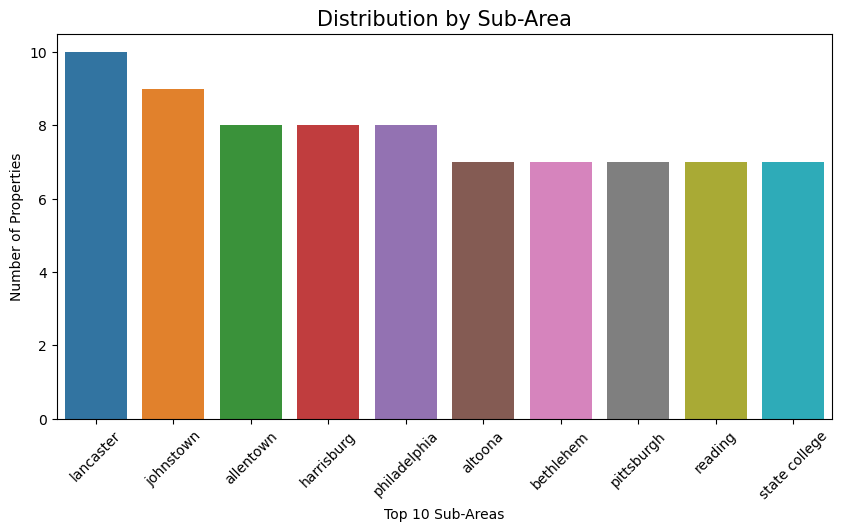

In [37]:
#distribution of Sub-Area 
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Number of Unique Sub_Area: {df1['Sub_Area'].nunique()}")

temp = df1.groupby('Sub_Area')['State'].count().reset_index().sort_values(by='State',ascending=False)[:10]
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp['Sub_Area'],y=temp['State'])
plt.title("Distribution by Sub-Area",size=15)
plt.xlabel("Top 10 Sub-Areas")  
plt.ylabel("Number of Properties") 
plt.xticks(rotation=45)
plt.show()

Number of Unique Company_Name: 10


,Company_Name,State
2,d.r. horton,15
4,lennar corporation,15
7,pulte homes,15
8,ryan homes,15
9,toll brothers,15
0,beazer homes,7
1,century communities,7
3,kb home,7
5,m/i homes,7
6,"nvr, inc.",7


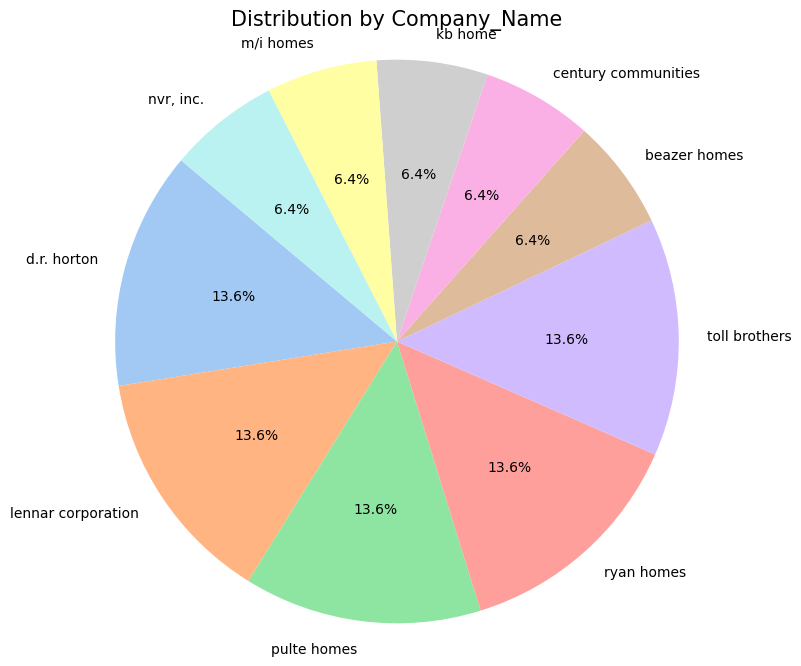

In [39]:
print(f"Number of Unique Company_Name: {df1['Company_Name'].nunique()}")

temp = df1.groupby('Company_Name')['State'].count().reset_index().sort_values(by='State',ascending=False)[:10]
display(temp)

plt.figure(figsize=(8,8))
plt.pie(temp['State'], labels=temp['Company_Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution by Company_Name",size=15)
plt.axis('equal')
plt.show()




In [41]:
print(df1.columns)

Index(['State', 'Country', 'Property Type Cleaned', 'Sub_Area', 'Company_Name',
       'ClubHouse Cleaned', 'School / University in Township Cleaned',
       'Hospital in TownShip Cleaned', 'Mall in TownShip Cleaned',
       'Park / Jogging track Cleaned', 'Swimming Pool Cleaned', 'Gym Cleaned',
       'TownShip Name/ Society Name Cleaned', 'Description Cleaned',
       'Property Area in Sq. Ft. cleaned', 'Price in $ (lakhs) cleaned'],
      dtype='object')


Number of Unique TownShip Name/ Society Name: 15


,TownShip Name/ Society Name Cleaned,State
1,chestnut hill village,10
0,brookwood townhomes,8
5,meadows at wilshire downs,8
9,the heights at falling water,8
2,greenfield apartments,7


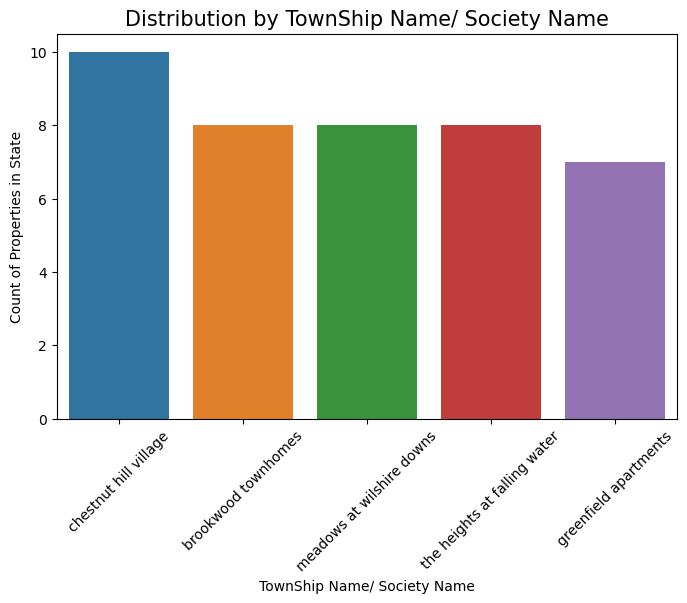

In [43]:
print(f"Number of Unique TownShip Name/ Society Name: {df1['TownShip Name/ Society Name Cleaned'].nunique()}")

temp = df1.groupby('TownShip Name/ Society Name Cleaned')['State'].count().reset_index().sort_values(by='State',ascending=False)[:5]
display(temp)

plt.figure(figsize=(8,5))
sns.barplot(x=temp['TownShip Name/ Society Name Cleaned'],y=temp['State'])
plt.title("Distribution by TownShip Name/ Society Name",size=15)
plt.xlabel("TownShip Name/ Society Name")
plt.ylabel("Count of Properties in State")
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Property Area:


,Property Area in Sq. Ft. cleaned
count,110.000000
mean,920.772727
std,389.386030
min,113.000000
25%,673.500000
50%,862.500000
75%,1091.750000
max,2267.000000


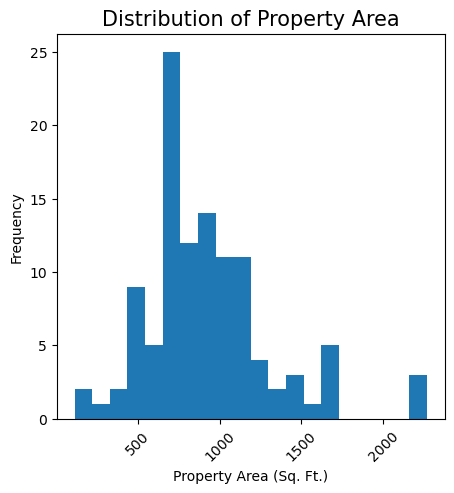

In [45]:
print("Summary Statistics of Property Area:")
display(df1[['Property Area in Sq. Ft. cleaned']].describe())

plt.figure(figsize=(5,5))
plt.hist(df1['Property Area in Sq. Ft. cleaned'],bins=20)
plt.title("Distribution of Property Area",size=15)
plt.xlabel('Property Area (Sq. Ft.)') 
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Price:


,Price in $ (lakhs) cleaned
count,109.000000
mean,100.854037
std,127.065269
min,14.000000
25%,51.000000
50%,72.500000
75%,96.000000
max,930.000000


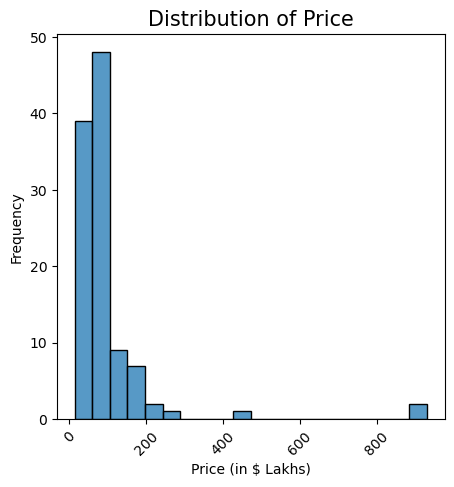

In [47]:
import warnings
warnings.filterwarnings('ignore')

print("Summary Statistics of Price:")
display(df1[['Price in $ (lakhs) cleaned']].describe())

plt.figure(figsize=(5,5))
sns.histplot(df1['Price in $ (lakhs) cleaned'],bins=20)
plt.title("Distribution of Price",size=15)
plt.xlabel('Price (in $ Lakhs)')
plt.ylabel('Frequency') 
plt.xticks(rotation=45)
plt.show()



,Property Area in Sq. Ft. cleaned,Price in $ (lakhs) cleaned
count,110.000000,109.000000
mean,920.772727,100.854037
std,389.386030,127.065269
min,113.000000,14.000000
25%,673.500000,51.000000
50%,862.500000,72.500000
75%,1091.750000,96.000000
max,2267.000000,930.000000


Property Area in Sq. Ft. cleaned    0.372597
Price in $ (lakhs) cleaned          1.000000
Name: Price in $ (lakhs) cleaned, dtype: float64


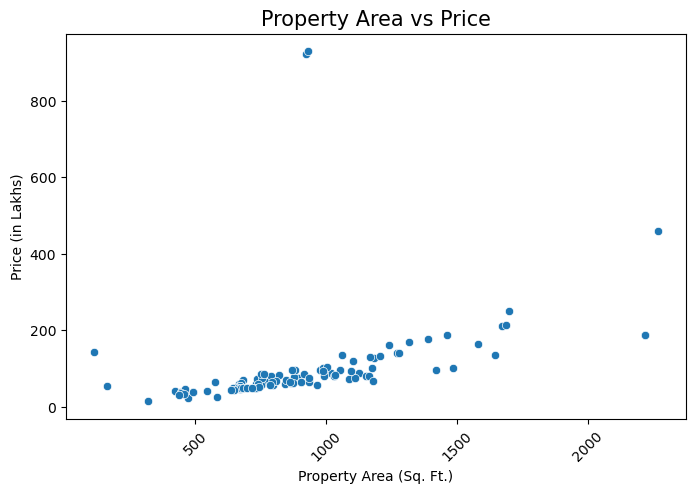

In [51]:
#Correlation between the property Area and price 
temp = df1[['Property Area in Sq. Ft. cleaned','Price in $ (lakhs) cleaned']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in $ (lakhs) cleaned'])

plt.figure(figsize=(8,5))
sns.scatterplot(x=temp['Property Area in Sq. Ft. cleaned'], y=temp['Price in $ (lakhs) cleaned'])
plt.title("Property Area vs Price",size=15)
plt.xlabel("Property Area in Sq. Ft.")
plt.xlabel("Property Area (Sq. Ft.)") 
plt.ylabel("Price (in Lakhs)") 
plt.xticks(rotation=45)
plt.show()

In [53]:
#3 main amenities for top 10% priced properties
# Filter for top 10% priced properties 
df1[['Price in $ (lakhs) cleaned']].describe()

,Price in $ (lakhs) cleaned
count,109.000000
mean,100.854037
std,127.065269
min,14.000000
25%,51.000000
50%,72.500000
75%,96.000000
max,930.000000


In [55]:
amenities_cols = df1.columns.tolist()[5:12]
display(amenities_cols)

['ClubHouse Cleaned',
 'School / University in Township Cleaned',
 'Hospital in TownShip Cleaned',
 'Mall in TownShip Cleaned',
 'Park / Jogging track Cleaned',
 'Swimming Pool Cleaned',
 'Gym Cleaned']

In [57]:
# selecting threshold as 80 Lakhs
temp = df1[df1['Price in $ (lakhs) cleaned']>=80][amenities_cols].sum().reset_index()
display(temp)

temp.rename(columns={'index':'Amenities',0:'Popularity'},inplace=True)
temp = temp.sort_values(by='Popularity',ascending=False)
display(temp)

,index,0
0,ClubHouse Cleaned,40
1,School / University in Township Cleaned,2
2,Hospital in TownShip Cleaned,2
3,Mall in TownShip Cleaned,2
4,Park / Jogging track Cleaned,43
5,Swimming Pool Cleaned,39
6,Gym Cleaned,41


,Amenities,Popularity
4,Park / Jogging track Cleaned,43
6,Gym Cleaned,41
0,ClubHouse Cleaned,40
5,Swimming Pool Cleaned,39
1,School / University in Township Cleaned,2
2,Hospital in TownShip Cleaned,2
3,Mall in TownShip Cleaned,2


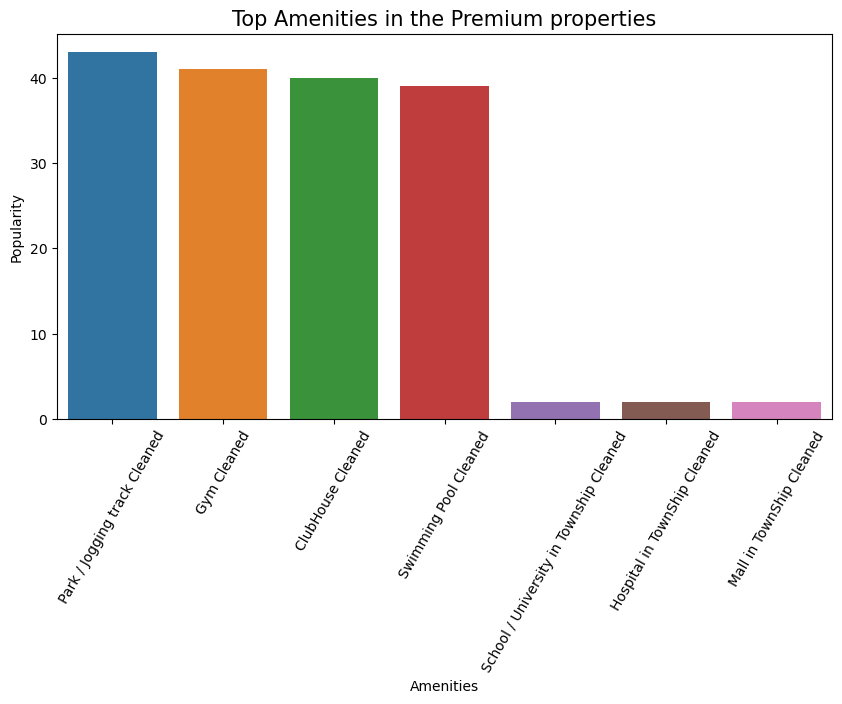

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x=temp['Amenities'],y=temp['Popularity'])
plt.title("Top Amenities in the Premium properties",size=15)
plt.xticks(rotation=60)
plt.show()

In [61]:
#checking is there are any null values in df
df1.isna().sum()

State                                      0
Country                                    0
Property Type Cleaned                      0
Sub_Area                                   0
Company_Name                               0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
Property Area in Sq. Ft. cleaned           0
Price in $ (lakhs) cleaned                 1
dtype: int64

In [63]:
#removing the null value 
df_final=df1.dropna()
df_final.isna().sum()

State                                      0
Country                                    0
Property Type Cleaned                      0
Sub_Area                                   0
Company_Name                               0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
Property Area in Sq. Ft. cleaned           0
Price in $ (lakhs) cleaned                 0
dtype: int64

In [65]:
df_final.head()

,State,Country,Property Type Cleaned,Sub_Area,Company_Name,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,Property Area in Sq. Ft. cleaned,Price in $ (lakhs) cleaned
0,pennsylvania,usa,1,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0
1,pennsylvania,usa,2,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0
2,pennsylvania,usa,3,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0
3,pennsylvania,usa,3,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...,1018.0,89.0
4,pennsylvania,usa,2,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t...",743.0,74.0


In [67]:
df_final.rename(columns={'TownShip Name/ Society Name Cleaned': 'TownShip Name/ Society Name',
                         'Description Cleaned':'Description','ClubHouse Cleaned':'ClubHouse',
                         'School / University in Township Cleaned':'School / University in Township',
                         'Hospital in TownShip Cleaned':'Hospital in TownShip','Mall in TownShip Cleaned':'Mall in TownShip',
                         'Park / Jogging track Cleaned':'Park / Jogging track','Swimming Pool Cleaned':'Swimming Pool',
                         'Gym Cleaned':'Gym','Property Area in Sq. Ft. cleaned':'Property Area in Sq. Ft.',
                          'Price in $ (lakhs) cleaned':'Price in $ (lakhs)','Property Type Cleaned':'Property Type'}, inplace=True)
df_final.head()


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs)
0,pennsylvania,usa,1,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0
1,pennsylvania,usa,2,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0
2,pennsylvania,usa,3,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0
3,pennsylvania,usa,3,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...,1018.0,89.0
4,pennsylvania,usa,2,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t...",743.0,74.0


In [69]:

output_file = r"C:\Users\sowmy\OneDrive\Desktop\IS\House Price Data Cleaned.csv"
df_final.to_csv(output_file, index=False)

In [71]:
print(f'DataFrame saved to {output_file}')

DataFrame saved to C:\Users\sowmy\OneDrive\Desktop\IS\House Price Data Cleaned.csv
